In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Importing data into dataframe
df = pd.read_csv('../data/raw/fff_Bw_1min.dat', delim_whitespace=True)

#Adding column names to dataframe
df.columns = ['year', 'month', 'day', 'hour', 'minute', 
              'L', 'MLT', 'MLAT', 'AL Index', 
              'KP Index', 'Satellite Flag', 'B']

# Converting year + month + day + hour + minute + second to datetime
datetime = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

# Adding datetime column to dataframe
df.insert(0, "datetime", datetime, True)

# Dropping useless columns
df = df.drop(['year', 'month', 'day', 'hour', 'minute', 'AL Index', 'KP Index'], axis=1)

df.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0.0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0.0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0.0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0.0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0.0,0.000933


In [29]:
df['Satellite Flag'].value_counts()

0.000000    482881
1.000000    461864
2.000000    459017
0.001010      2519
0.001040      2455
             ...  
0.169000         1
0.236000         1
0.000566         1
0.088200         1
0.278000         1
Name: Satellite Flag, Length: 2334, dtype: int64

In [30]:
# Converting satellite flag values to int
df['Satellite Flag'] = df['Satellite Flag'].astype(int)
df['Satellite Flag'].value_counts()

0    738633
1    461864
2    459017
Name: Satellite Flag, dtype: int64

In [31]:
df_sat0 = df.loc[(df['Satellite Flag'] == 0)]
df_sat0.head()

,datetime,L,MLT,MLAT,Satellite Flag,B
0,2010-06-01 10:51:00,9.13,22.69,-1.43,0,0.000765
1,2010-06-01 10:52:00,9.03,22.7,-1.44,0,0.000699
2,2010-06-01 10:53:00,9.02,22.7,-1.45,0,0.000786
3,2010-06-01 10:54:00,9.06,22.71,-1.46,0,0.000748
4,2010-06-01 10:55:00,8.95,22.72,-1.48,0,0.000933


In [32]:
df_sat0['Satellite Flag'].value_counts()

0    738633
Name: Satellite Flag, dtype: int64

In [33]:
df_sat0_sorted = df_sat0.sort_values(by = 'datetime')

(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.,
        736330., 736695.]), <a list of 9 Text xticklabel objects>)

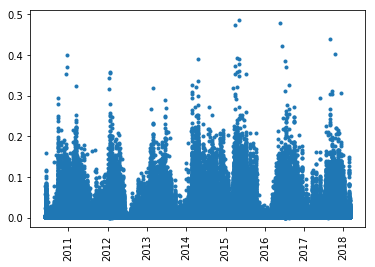

In [34]:
# Plotting data for 1 satellite to see if there is a trend
plt.plot(df_sat0_sorted['datetime'], df_sat0_sorted['B'], '.')
plt.xticks(rotation='vertical')

In [39]:
# Check if measurements are being taken every minute or not
df_sat0_sorted['datetime_diff'] = df_sat0_sorted['datetime'].diff()
df_sat0_sorted.head()
df_sat0_sorted['datetime_diff'].value_counts()

0 days 00:01:00    643432
0 days 00:00:00     83976
0 days 00:02:00      3394
0 days 00:03:00      1405
0 days 00:04:00       700
                    ...  
3 days 02:23:00         1
1 days 19:32:00         1
0 days 15:30:00         1
0 days 17:05:00         1
0 days 02:14:00         1
Name: datetime_diff, Length: 1526, dtype: int64

In [ ]:
# Clearly there is missing data, we can use some technique to fill it

In [ ]:
# Run LSTM/ARIMA/ARCH/VAR